# logistic regression

> #### Logistic regression algorithm is used to solve classification problems.

### Cost Function

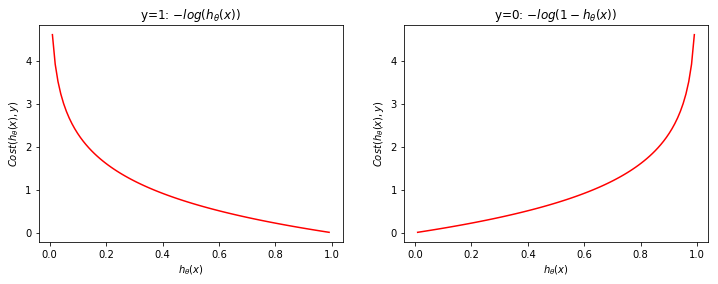

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def f_1(x):
    return -np.log(x)

def f_0(x):
    return -np.log(1 - x)

X = np.linspace(0.01, 0.99, 100)
f = [f_1, f_0]
titles = ["y=1: $-log(h_\\theta(x))$", "y=0: $-log(1 - h_\\theta(x))$"]
plt.figure(figsize=(12, 4))
for i in range(len(f)):
    plt.subplot(1, 2, i + 1)
    plt.title(titles[i])
    plt.xlabel("$h_\\theta(x)$")
    plt.ylabel("$Cost(h_\\theta(x), y)$")
    plt.plot(X, f[i](X), 'r-')

###   cost(hθ(x),y)=−ylog(hθ(x))−(1−y)log(1−hθ(x))



### Predictive function

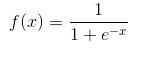

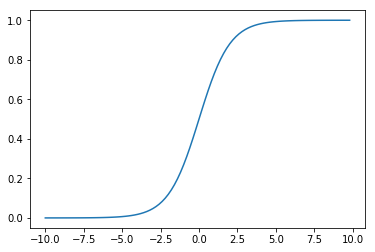

In [10]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

## L1/L2 norm

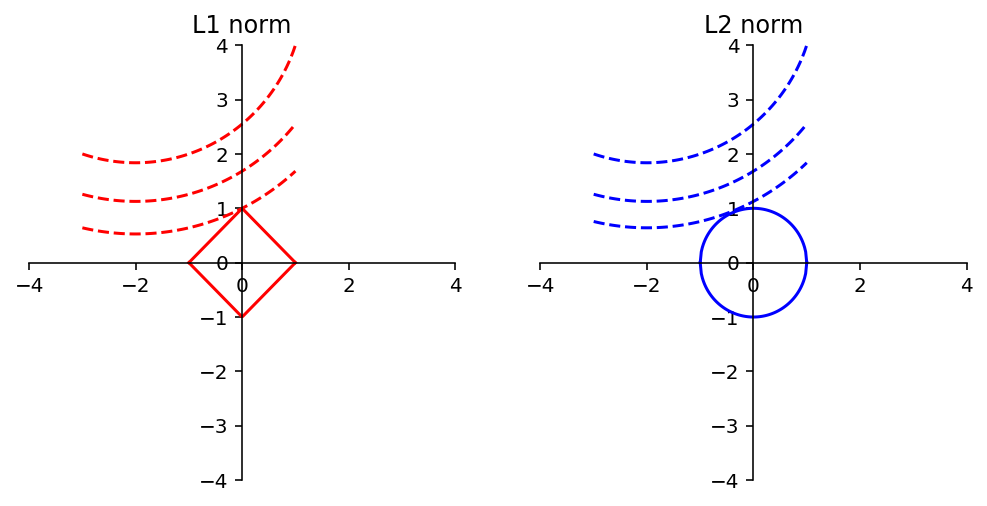

In [11]:
def L1(x):
    return 1 - np.abs(x)

def L2(x):
    return np.sqrt(1 - np.power(x, 2))

def contour(v, x):
    return 5 - np.sqrt(v - np.power(x + 2, 2))  

def format_spines(title):    
    ax = plt.gca()                                 
    ax.spines['right'].set_color('none')           
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')       
    ax.spines['bottom'].set_position(('data',0))    
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))     

    plt.title(title)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

plt.figure(figsize=(8.4, 4), dpi=144)

x = np.linspace(-1, 1, 100)
cx = np.linspace(-3, 1, 100)

plt.subplot(1, 2, 1)
format_spines('L1 norm')
plt.plot(x, L1(x), 'r-', x, -L1(x), 'r-')
plt.plot(cx, contour(20, cx), 'r--', cx, contour(15, cx), 'r--', cx, contour(10, cx), 'r--')

plt.subplot(1, 2, 2)
format_spines('L2 norm')
plt.plot(x, L2(x), 'b-', x, -L2(x), 'b-')
plt.plot(cx, contour(19, cx), 'b--', cx, contour(15, cx), 'b--', cx, contour(10, cx), 'b--')

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y==1].shape[0], y[y==0].shape[0]))
print(cancer.data[0])

data shape: (569, 30); no. positive: 357; no. negative: 212
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [13]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
# Split data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression
# Create and train model
model = LogisticRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
    train_score=train_score, test_score=test_score))

train score: 0.956044; test score: 0.973684


In [16]:
y_pred = model.predict(X_test)
print('matchs: {0}/{1}'.format(np.equal(y_pred, y_test).sum(), y_test.shape[0]))

matchs: 111/114


In [18]:
# Probability problem
y_pred_proba = model.predict_proba(X_test)
print('sample of predict probability: {0}'.format(y_pred_proba[0]))
print(y_pred_proba.shape)
y_pred_proba_0 = y_pred_proba[:, 0] > 0.1 
result = y_pred_proba[y_pred_proba_0]
y_pred_proba_1 = result[:, 1] > 0.1
print(result[y_pred_proba_1])

sample of predict probability: [0.0029105 0.9970895]
(114, 2)
[[0.56923269 0.43076731]
 [0.8931134  0.1068866 ]
 [0.17480988 0.82519012]
 [0.30724607 0.69275393]
 [0.49323292 0.50676708]
 [0.11448602 0.88551398]
 [0.79176727 0.20823273]
 [0.82381973 0.17618027]]


In [19]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

model = polynomial_model(degree=2, penalty='l1')

start = time.clock()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(
    time.clock()-start, train_score, cv_score))

elaspe: 0.309646; train_score: 1.000000; cv_score: 0.982456


In [20]:
logistic_regression = model.named_steps['logistic_regression']
print('model parameters shape: {0}; count of non-zero element: {1}'.format(
    logistic_regression.coef_.shape, 
    np.count_nonzero(logistic_regression.coef_)))

model parameters shape: (1, 495); count of non-zero element: 93


elaspe: 30.400788


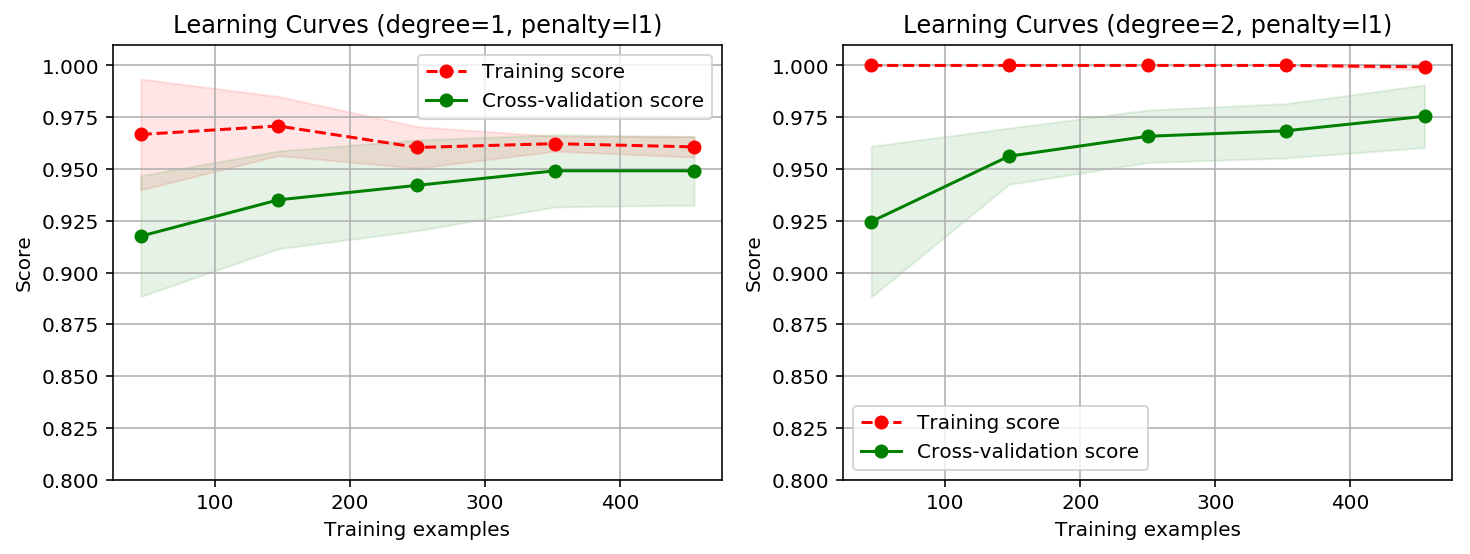

In [21]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty = 'l1'

start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty, solver='liblinear', max_iter=300), 
                        title.format(degrees[i], penalty), X, y, ylim=(0.8, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))

elaspe: 9.193952


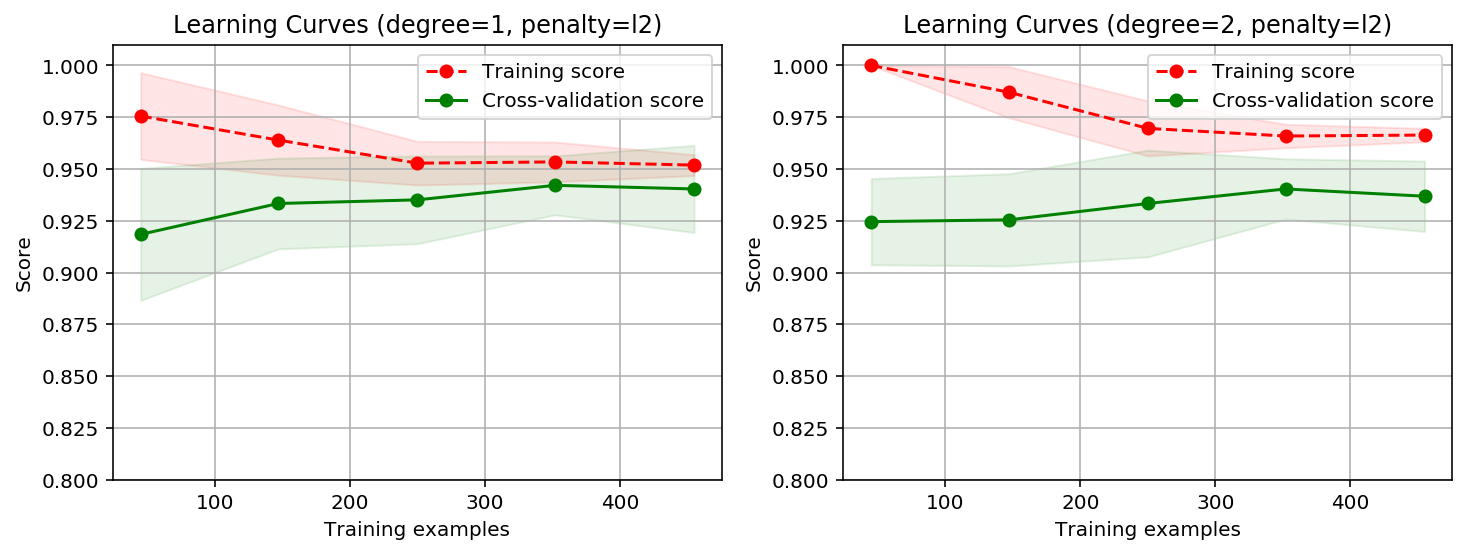

In [22]:
import warnings
warnings.filterwarnings("ignore")

penalty = 'l2'

start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty, solver='lbfgs'), 
                        title.format(degrees[i], penalty), X, y, ylim=(0.8, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))

## Advantage:
> * Realization of simplicity.
> * The amount of computation is very small, and the speed is very fast.
> * The probability of using samples can be predicted.
> * Regularization can be used to solve the over fitting problem.

## Disadvantage:
> * The more input features, the worse the performance.
> * It is easy to be ill fitted, and the general accuracy is not very high.
> * It is more applicable to two classification problems.(softmax)
> * Only for linear problems